## Gyasi Bawuah: 
    Analyzing the speech of US Federal Reserve Chairman Ben S Bernanke, testified before a Congressional committee 
    on October 20, 2008.

         T1.  Read in or create a data frame with at least one column of text to be analyzed.  This could be the text you used previously or new text. Based on the context of your dataset and the question you want to answer, identify at what processing you think is necessary (stop words, stemming, custom replacement, etc.) Compare the feature space before and after your processing. 

_

## Importing prerequisites: pandas, numpy, bs4, and requests

In [2]:
import pandas as pd   
import numpy as np
from bs4 import BeautifulSoup
import requests
pd.set_option('display.max_colwidth', 150)



## Getting the text from the website, 
    https://www.rte.ie/news/special-reports/2008/1020/109456-bernankeb/

In [608]:
page = requests.get('https://www.rte.ie/news/special-reports/2008/1020/109456-bernankeb/')
soup = BeautifulSoup(page.text, "html.parser")

## Creating a dataframe to capture the texts of the testimony, called Speech

In [3]:
fed_testimony = []
speech = soup.findAll('p')

for speech in speech:
    fed_testimony.append(speech.get_text())

In [4]:
fed_testimony = fed_testimony[2:]

In [6]:
df = pd.DataFrame(np.array(fed_testimony), columns = ['speech'])
df.head(10)

,speech
0,"US Federal Reserve Chairman Ben S BernankeEconomic outlook and financial marketsBefore the Committee on the Budget, US House of RepresentativesOct..."
1,"Chairman Spratt, Representative Ryan, and other members of the Committee, I appreciate this opportunity to discuss recent developments in financia..."
2,Financial Developments
3,"As you know, financial markets in the United States and some other industrialised countries have been under severe stress for more than a year. Th..."
4,"The financial turmoil intensified in recent weeks, as investors' confidence in banks and other financial institutions eroded and risk aversion hei..."
5,"In collaboration with governments and central banks in other countries, the Treasury and the Federal Reserve have taken a range of actions to amel..."
6,The recently enacted Emergency Economic Stabilization Act provided critically important new tools to address the dysfunction in financial markets ...
7,"As another measure to improve confidence, the act also temporarily raised the limit on the deposit insurance coverage provided by the Federal Depo..."
8,"These measures were announced less than a week ago, and, although there have been some encouraging signs, it is too early to assess their full eff..."
9,Economic Outlook


>

# Preprocessing

## Removing known stopwords from the dataframe, using CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv_english = CountVectorizer(stop_words="english") 
cv_english_fed = cv_english.fit_transform(fed_testimony)
print(cv_english_fed.shape)


(27, 686)


In [604]:
#stopwords_list  = cv_english.get_stop_words()
#stopwords_list = list(stopwords_list)
#type(stopwords_list)

## Building a wordcloud to represent most frequently occuring words 

In [24]:
from wordcloud import WordCloud, STOPWORDS


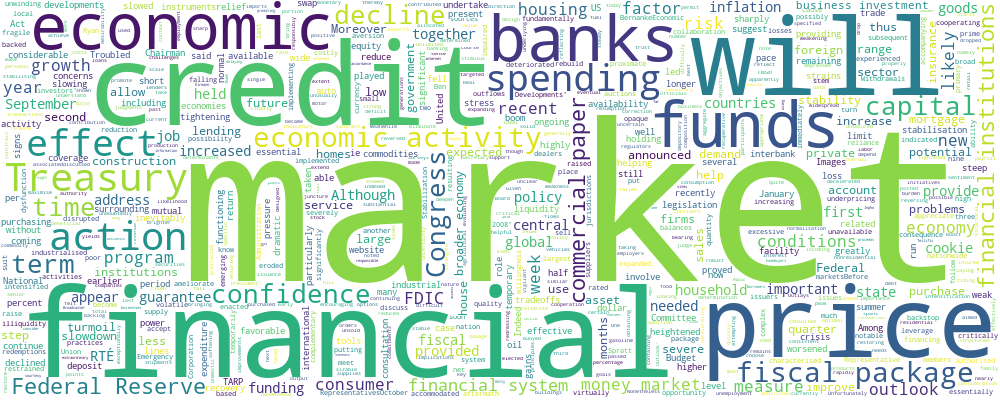

In [25]:
wordcloud = WordCloud(background_color="white", max_words=2000, width=1000, height=400, stopwords=STOPWORDS ).generate(str(fed_testimony))
wordcloud.to_image()

>

>

         T2. Create a sentiment dictionary from one of the sources in class or find/create your own (potential bonus points for appropriate creativity). Using your dictionary, create sentiment labels for the text entries in your corpus.

## My choice of Sentiment Dictionary is WordNet, based on Python's Library, TextBlob.


            WordNet is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each   expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.

        source: https://wordnet.princeton.edu/

            TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, etc.

        source: https://textblob.readthedocs.io/en/dev/

## Importing TextBlob as tb, Creating tb object, and fitting tb on the text document, and scoring the sentiment of the text.


    

               TextBlob measures sentiments in 3 ways, in a rage of +1 to -1:
                Polarity (whether the tone/sentiment is positive (+1) or negative(-1), or Neutral (0))
                subjectivity (whether the text suggests a highly subjective (+1) opinion or not subjective (-1))
                Objectivity (whether the opinion is objective)
    
    source: https://textblob.readthedocs.io/en/dev/api_reference.html#textblob.blob.TextBlob

In [610]:
from textblob import TextBlob as tb

fed_text  = str(fed_testimony)


In [611]:
tb_fed = tb(fed_text)

In [612]:
tb_fed.sentiment

Sentiment(polarity=0.07611048812856037, subjectivity=0.3860878724131736)

In [614]:
polarity_score = tb_fed.sentiment.polarity


## The Assessment Score shows that: 
    Polarity of the fed_testimony document is 0.076, which suggests a positive sentiment, and subjectivity of 0.39, which suggests a lower than average subjective opinion.

## Creating a program, called evaluate, to state the sentiment label of the document

In [616]:
def evaluate(float):
    if polarity_score >=0.0:
        sentiment = print('Positive Sentiment')
    elif fdr_score <=0.0:
        sentiment = print('Negative Sentiment')
    else:
        sentiment = print('Neutral')
    return(sentiment)


In [617]:
evaluate(polarity_score)

Positive Sentiment


## Determining the Sentiment Labels of the tokens that make up the document

In [619]:
fed_wd_polarity = tb_fed.sentiment_assessments.assessments


In [318]:
word_score = pd.DataFrame(fed_wd_polarity, columns=('word', 'polarity', 'subjectivity', 'objectivity'))
word_score.head()

,word,polarity,subjectivity,objectivity
0,[financial],0.000,0.000,None
1,[other],-0.125,0.375,None
2,[recent],0.000,0.250,None
3,[financial],0.000,0.000,None
4,[economic],0.200,0.200,None


## The objectivity column is 'None' for all the tokens, so it is being removed

In [319]:
del word_score['objectivity']

In [320]:
word_score.head()

,word,polarity,subjectivity
0,[financial],0.000,0.000
1,[other],-0.125,0.375
2,[recent],0.000,0.250
3,[financial],0.000,0.000
4,[economic],0.200,0.200


## Determning the Top Positive and Top Negative Words
        The words are all surrouneded by brackets, so they need to be removed, to have a clean list.

In [330]:
word = word_score['word']
word2 = list(word)
sample = word2[0]


In [475]:
clean_word = sample[-1]


In [476]:
word_list = []
for sample in word2:
    clean_word = sample[-1]
    word_list.append(clean_word)

In [477]:
word_list  = list(word_list)


In [478]:
polarity  = word_score['polarity']
polarity = list(polarity)


In [479]:
data = pd.DataFrame([word_list, polarity])
data = data.T


In [480]:
data = data.rename(columns={0: 'word', 1: 'polarity score'})
data_grouped = data.groupby('polarity score').max()

## Top 10 Positive Words

In [481]:

data_grouped.tail(10)


,word
polarity score,
0.350000,full
0.375000,significantly
0.400000,primary
0.433333,strong
0.500000,notable
0.600000,rose
0.666667,exceptionally
0.800000,greatly
0.900000,ideal


## Top 10 Negative Words

In [482]:
data_grouped.head(10)

,word
polarity score,
-0.500000,unfortunately
-0.433333,dramatic
-0.400000,poor
-0.375000,weak
-0.300000,complex
-0.250000,small
-0.200000,few
-0.166667,quickly
-0.155556,down


>

>

             T3. Consider one of the entries in your corpus that had a surprising label.  How would you change your analysis to get the “right” label? 
             Show specific results. 

>

## Using a paragraph from the Bernanke's Testimony as an example, the word 'Primary' is a surprising label. It comes as positive with polarity of 0.4, but also, subjective, a score of 0.5

In [492]:
tx = "To address ongoing pressures in interbank funding markets, the Federal Reserve significantly increased the quantity of term funds it auctions to banks and accommodated heightened demands for funding from banks and primary dealers. We have also greatly expanded our currency swap lines with foreign central banks."
tx

'To address ongoing pressures in interbank funding markets, the Federal Reserve significantly increased the quantity of term funds it auctions to banks and accommodated heightened demands for funding from banks and primary dealers. We have also greatly expanded our currency swap lines with foreign central banks.'

In [502]:
tx_with_primary = tb(tx).sentiment.polarity
tx_with_primary

0.29000000000000004

## While this paragraph includes the word 'Primary', polarity of the paragraph is 0.29, which is a positive sentiment

In [494]:
tb('primary').sentiment

Sentiment(polarity=0.4, subjectivity=0.5)

In [497]:
tx2 = "To address ongoing pressures in interbank funding markets, the Federal Reserve significantly increased the quantity of term funds it auctions to banks and accommodated heightened demands for funding from banks and  dealers. We have also greatly expanded our currency swap lines with foreign central banks."
tx2

'To address ongoing pressures in interbank funding markets, the Federal Reserve significantly increased the quantity of term funds it auctions to banks and accommodated heightened demands for funding from banks and  dealers. We have also greatly expanded our currency swap lines with foreign central banks.'

In [505]:
tx_no_primary = tb(tx2).sentiment.polarity
tx_no_primary

0.2625

## But when the word 'Primary' is removed from that context, the entire paragraph losses some polarity. So, if a word ever appeared to have a surprising label, I would simply remove it from the document, just as I have done with the word 'Primary'.

>

>

## Bonus points:
       ### How can you use POS tagging to improve lemmatization? Write code to implement your idea and show a simple example of how code improves on the default lemmatizer.


    Each word in TextBlob.words or Sentence.words is a Word object (a subclass of unicode) with useful methods, e.g. for word inflection and lemmatization.
    Words can be lemmatized by calling the lemmatize method.
    
    source: http://textblob.readthedocs.io/en/dev/quickstart.html#words-inflection-and-lemmatization

## Importing Word, and a textblob object

In [534]:
from textblob import Word


In [591]:
txt = tb("As you know, financial markets in the United States and some other industrialised countries have been under severe stress for more than a year")
txt

TextBlob("As you know, financial markets in the United States and some other industrialised countries have been under severe stress for more than a year")

## Using the tag method in textblob to classify the texts based on their parts of speech (POS)

In [592]:
txt.tags

[('As', 'IN'),
 ('you', 'PRP'),
 ('know', 'VBP'),
 ('financial', 'JJ'),
 ('markets', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('and', 'CC'),
 ('some', 'DT'),
 ('other', 'JJ'),
 ('industrialised', 'JJ'),
 ('countries', 'NNS'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('under', 'IN'),
 ('severe', 'JJ'),
 ('stress', 'NN'),
 ('for', 'IN'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('year', 'NN')]

## Using the words countries, and economies as examples, we can see their POS tags as NNS- Noun and Plural

    pos tag definitions: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    
  ## When the NNS tags are lemmatized, we get their singular versions.

In [599]:
w = Word("countries")
w.lemmatize()


'country'

In [603]:
w2 = Word("economies")
w2.lemmatize()


'economy'

## Finally, by understaning the POS tags of words, we can appropriately determine how to lemmatize them. 